# Для начала нужно найти компоненты связности, а потом связать их друг с другом, построив ориентированный ациклический граф

#### Вдохновение [раз](https://habr.com/ru/articles/709096/) и [два](https://site.ada.edu.az/~medv/acm/Docs%20e-olimp/Volume%2040/3986.htm)

##### Вот здесь лежит жуткая функция визуализации графов

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(edges, title, edges_to_add=None):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G) 
    
    plt.figure(figsize=(8, 8))
    
    nx.draw(G,pos,
                with_labels=True,
                node_size=2000,
                node_color="lightblue",
                font_size=15,
                font_color="black",
                font_weight="bold",
                edge_color="gray",
                arrowsize=20,
                arrowstyle="->",
            )
    
    if edges_to_add:
        G.add_edges_from(edges_to_add)
        nx.draw_networkx_edges(G, pos,
                                    edgelist=edges_to_add,
                                    edge_color="red",
                                    style="dashed",
                                    arrowsize=20,
                                    arrowstyle="->",
                                )
    
    plt.title(title, fontsize=20)
    plt.show()


# Main

In [181]:
from collections import defaultdict

def strongly_connected_components(graph, n):
    '''
    Алгоритм Тарьяна для поиска компонент сильной связности (SCC)
    '''
    index = [-1] * n
    lowlink = [-1] * n
    on_stack = [False] * n
    stack = []
    scc = []
    idx = [0]  

    def dfs(v):
        ''' 
        deep-first search by itself
        '''
        index[v] = lowlink[v] = idx[0]
        idx[0] += 1
        stack.append(v)
        on_stack[v] = True

        for leave in graph[v]:
            if index[leave] == -1: 
                dfs(leave)
                lowlink[v] = min(lowlink[v], lowlink[leave])
            elif on_stack[leave]:  
                lowlink[v] = min(lowlink[v], index[leave])

        if lowlink[v] == index[v]: #то есть если компонента связности таки найдена (вернулись в вершину)
            component = []
            while stack:    #теперь нужно пройтись по ней обратно, чтобы записать ее как компоненту связности
                node = stack.pop()
                on_stack[node] = False
                component.append(node)
                if node == v:
                    break
            scc.append(component)

    for i in range(n):
        if index[i] == -1:
            dfs(i)
    
    return scc

def build_adjacency_list(edges, n):
    ''' 
    строим списки смежности для оптимизации доступа к графу
    '''
    adj_list = [[] for k in range(n)]
    for u, v in edges:
        adj_list[u].append(v)
    return adj_list

def main(n, edges):
    '''
    ищем минимальное количество ребер здесь, здесь же и рисуем графы
    '''
    graph = build_adjacency_list(edges, n)
    visualize_graph(edges, "Исходный граф")
    scc = strongly_connected_components(graph, n)

    component_id = [-1] * n
    for i, component in enumerate(scc):
        for node in component:
            component_id[node] = i #вот здесь мы условно получаем [0, 0, 0, 1, 1, 2]

    component_graph = defaultdict(set) #здесь мы получаем граф, где каждая вершина это вся компонента связности целиком
    in_degree = [0] * len(scc)
    out_degree = [0] * len(scc)

    for u in range(n):
        for v in graph[u]:
            if component_id[u] != component_id[v]: #если вершины принадлежат разным компонентам, то мы добавляем ребро между ними
                if component_id[v] not in component_graph[component_id[u]]:
                    component_graph[component_id[u]].add(component_id[v]) #добавляем v как соседа u
                    out_degree[component_id[u]] += 1
                    in_degree[component_id[v]] += 1

    dag_edges = []
    for u, targets in component_graph.items(): #для каждой вершины u перебираем ее соседей по компонентам связности
        for v in targets:
            dag_edges.append((u, v))
    visualize_graph(dag_edges, "ациклический орграф из компонент сильной связности")

    sources = [i for i, x in enumerate(in_degree) if x == 0] #это вершины ребер dag'a без входщих ребер
    sinks = [i for i, x in enumerate(out_degree) if x == 0]# а это вершины ребер dag'a без исходящих ребер

    edges_to_add = []
    for i in range(max(len(sources), len(sinks))):
        source = sources[i % len(sources)] 
        sink = sinks[i % len(sinks)]
        edges_to_add.append((source, sink))

    visualize_graph(edges + edges_to_add, "Итоговый граф с добавленными рёбрами", edges_to_add)

    return len(edges_to_add)



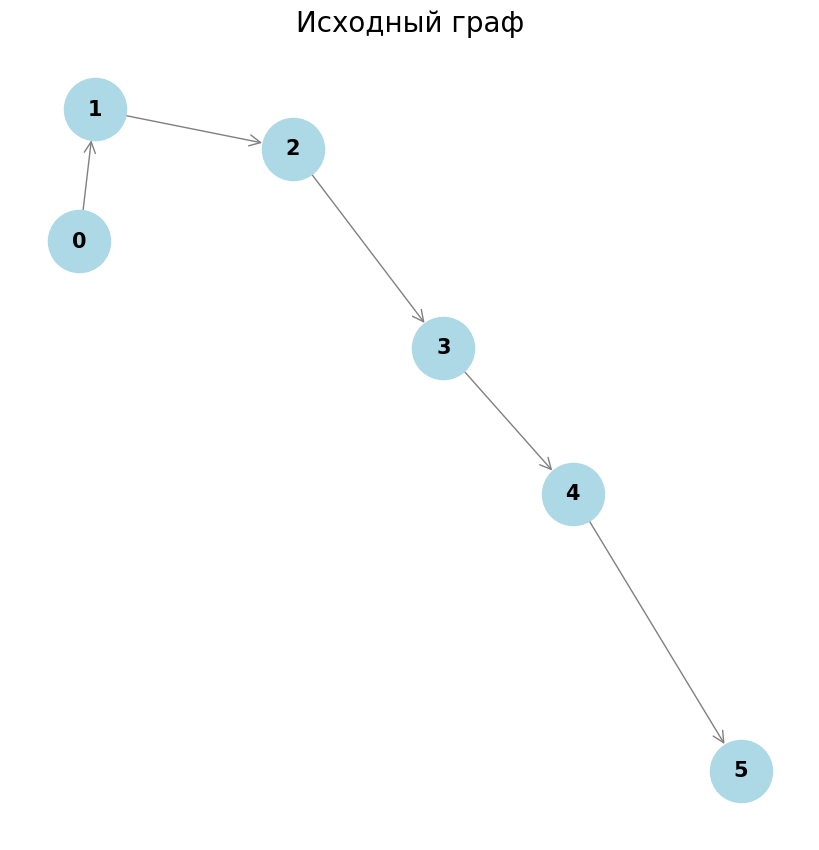

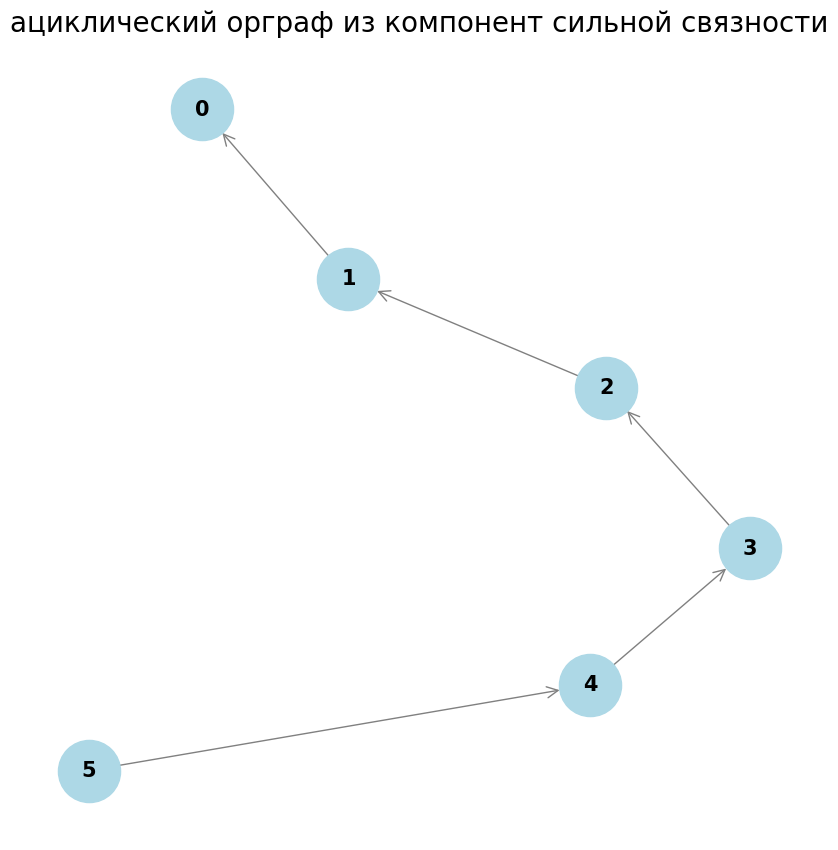

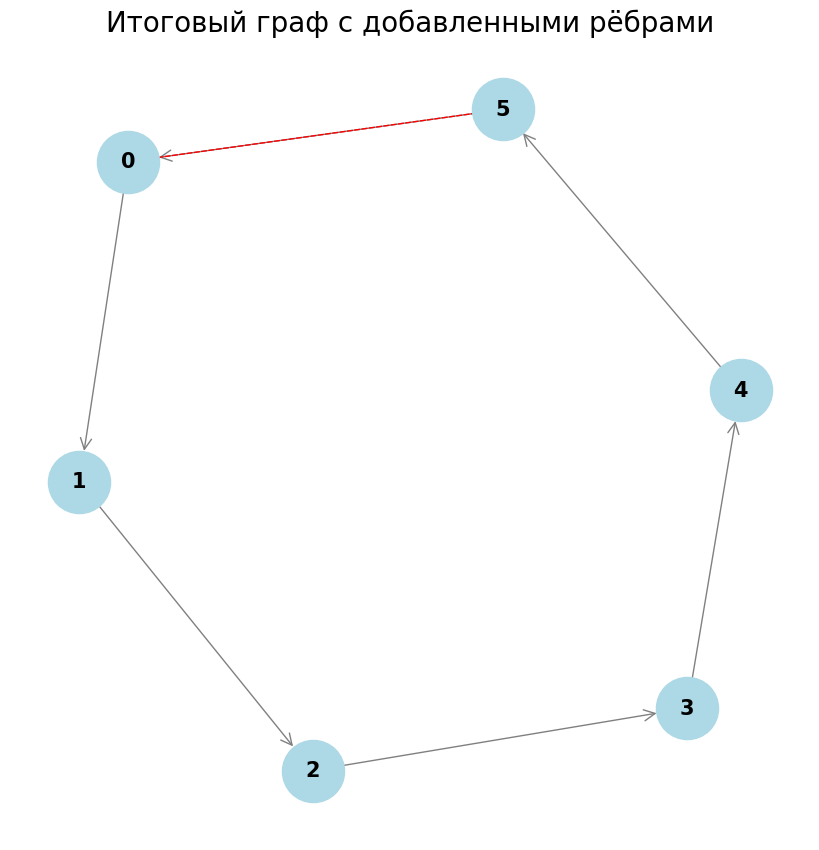

Минимальное число рёбер для сильной связности: 1


In [194]:
n = 6
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
min_edges = main(n, edges)
print("Минимальное число рёбер для сильной связности:", min_edges)

Не работает с [(0,1),(3,4)]!!!!!